<a href="https://colab.research.google.com/github/srijita1406/Data-Analytics/blob/main/Week_9_Activity_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [ ]:
# Read the spreadsheet data (from Data_Fitting.xlsx) into a Pandas dataframe
df = pd.read_excel("Data_Fitting.xlsx")
# Preview the data
df.head()

,Data
0,75
1,80
2,20
3,45
4,42


In [ ]:
# S stands for this sampling
S = df.Data.values
S

array([75, 80, 20, ..., 25, 10, 50])

# 1.) Histogram of the Data

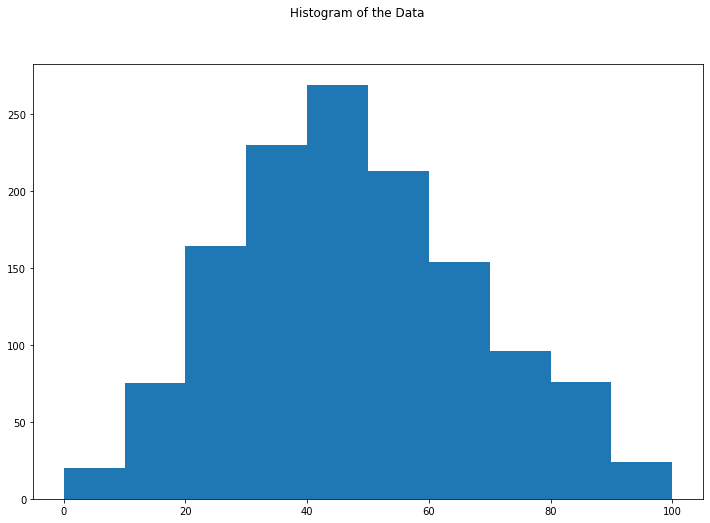

In [ ]:
# df.plot(kind = "hist")
fig, ax = plt.subplots(figsize = (12, 8))
fig.suptitle("Histogram of the Data")
ax.hist(S)
plt.show()

# 2.) Fit One of the Known Distributions to the Data Using Both Method of Moments and Maximum Likelihood Estimators

From the histogram of the given data, it seems like it could possibly be a **Normal** distribution, i.e.,
**X ~ $Normal(\mu, \sigma^2)$**. So we have unknown parameters $\mu$ and $\sigma$ and we are supposed to fit the data to such a distribution, i.e., build estimators for the unknown parameters.

### (a) MM (Method of Moments) Estimation

Considering X ~ $Normal(\mu, \sigma^2)$<br/>
We have **first moment**, $m_1=E[X]=\mu$<br/>
and **second moment**, $m_2=E[X^2]=(E[X])^2+Var(X)=\mu^2+\sigma^2$

From the above two equations we have<br/>
$\mu=m_1$<br/>
$\sigma=\sqrt{m_2-m_1^2}$

So if our **sample moments** for the given data are $M_1, M_2$, then our **MM Estimators** are:<br/>
$\hat{\mu}=M_1$<br/>
$\hat{\sigma}=\sqrt{M_2-M_1^2}$

In [ ]:
# Sample moments
m1 = np.mean(S)
m2 = np.mean(S ** 2)
m1, m2

(45.02800908402725, 2423.3853141559425)

In [ ]:
# Parameters estimated using MM Estimators
mumm = m1
sigmamm = np.sqrt(m2 - m1 ** 2)
mumm, sigmamm

(45.02800908402725, 19.896324084732374)

So the estimated parameters using MM Estimators are:<br/>
$\mu_{mm}=45.028, \sigma_{mm}=19.896$

### (b) ML (Maximum Likelihood) Estimation

We have a total of **n** data entries in our sample $(x_1, x_2,..., x_n)$.<br/>
So the likelihood of this sample is given by<br/>
$L=(\frac{1}{\sigma\sqrt{2\pi}})^n.e^{\frac{-(\mu-x_1)^2-(\mu-x_2)^2-...-(\mu-x_n)^2}{2\sigma^2}}$<br/>
To find estimators for our parameters, we need to maximize this function, i.e.,<br/>
$\hat{\mu}, \hat{\sigma}=argmax_{(\mu, \sigma)}(L)$<br/>
But since maximizing this function is quite difficult and time-consuming, we can maximize its (natural) log instead, i.e.,<br/>
$\hat{\mu}, \hat{\sigma}=argmax_{(\mu, \sigma)}(lnL)$

$lnL=-n.ln(\sqrt{2\pi})-n.ln(\sigma)-\frac{n\mu^2}{2\sigma^2}-\frac{x_1^2+...+x_n^2}{2\sigma^2}+\frac{\mu(x_1+...+x_n)}{\sigma^2}$

We equate partial derivatives of the log-likelihood function (calculated above) with respect to $\mu$ and $\sigma$ to zero, to obtain two equations which will be used to find the estimators for the parameters:<br/>
$\frac{\partial(lnL)}{\partial\mu}=0$<br/>
$\frac{\partial(lnL)}{\partial\sigma}=0$<br/>

This gives<br/>
$\hat{\mu}=\frac{x_2+...+x_n}{n}$<br/>
$\hat{\sigma}=\sqrt{\frac{(x_1-\mu)^2+...(x_n-\mu)^2}{n}}$

In [ ]:
n = len(S)
n

1321

In [ ]:
# Parameters estimated using ML Estimators
muml = np.mean(S)
# sigmaml = np.sqrt(np.sum((S - muml) ** 2) / n)
sigmaml = np.std(S)
muml, sigmaml

(45.02800908402725, 19.89632408473238)

So the estimated parameters using ML Estimators are:<br/>
$\mu_{ml}=45.028, \sigma_{ml}=19.896$

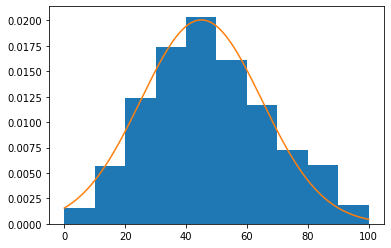

In [ ]:
# Plot our predicted distribution with the given data using a density plot
x = np.linspace(0, 100, n)
plt.hist(S, density = True)
plt.plot(x, st.norm.pdf(x, loc = muml, scale = sigmaml))
plt.show()

# 3.) Form Approximate Confidence Intervals Using the Bootstrap Method

We have from both the types of estimators that our estimated parameters are<br/>
$\hat\mu=45.028, \hat\sigma=19.896$<br/>

But these values correspond to only the given sampling. So we are also interested in finding a **confidence interval** (say 95%) for each of our parameters.<br/>
A $\gamma$% confidence interval for a parameter $\theta$ refers to the interval $[\hat\theta-\delta_1, \hat\theta-\delta_2]$ (where $\hat\theta$ is the estimated/expected value of the parameter) in which we expect the value of the parameter to be $\gamma$% of the times.<br/>
i.e., if $\gamma=100(1-\delta)$ then<br/>
$P(\hat\theta-\delta_1<\theta\leq\hat\theta-\delta_2)=1-\delta$

So we do the following assignments<br/>
$P(\hat\theta-\theta\leq\delta_1)=1-\frac{\delta}{2}$<br/>
$P(\hat\theta-\theta\leq\delta_2)=\frac{\delta}{2}$<br/>
$\implies P(\hat\theta-\delta_1<\theta\leq\theta-\delta_2)=1-\frac{\delta}{2}-\frac{\delta}{2}=1-\delta$<br/>


Then we use the **Bootstrap method** (uses Monte Carlo simulation) to calculate the required confidence interval. In this method, we use our estimated parameters $\hat\theta$ to randomly generate n-sized samplings a large number of times (say, N = 1000); each time estimating the parameters for that particular sample generated, resulting in the creation of a sample distribution $\theta$ of each of the parameters.<br/>
We then find the $100(\frac{\delta}{2})$th percentile of the error to calculate $\delta_2$ and the $100-100(\frac{\delta}{2})$th percentile of the error to calculate $\delta_1$.<br/>
In our case, $\delta=0.05$

In [ ]:
# Bootstrap method to approximate 95% confidence interval for both the parameters
N = 1000  # Number of iterations for Monte-Carlo simulation
d = 0.05  # delta
# Initialize an empty array for each of the parameters
muHat = np.zeros(N)
sigmaHat = np.zeros(N)
# Monte-Carlo simulation
for i in range(N):
  # Randomly generated n-sized normal distribution with our estimated parameters
  xi = st.norm.rvs(loc = muml, scale = sigmaml, size = n)
  # Estimate parameters for this sample
  mui = np.mean(xi)
  sigmai = np.std(xi)
  # Add them to their respective arrays
  muHat[i] = mui
  sigmaHat[i] = sigmai

In [ ]:
# Get the error distributions
muError = muHat - muml
sigmaError = sigmaHat - sigmaml

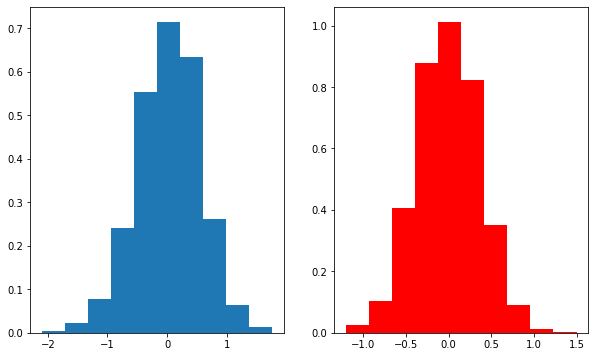

In [ ]:
# Histogram of the error of the distribution of each of the parameters
fig, ax = plt.subplots(1, 2, figsize = (10, 6))
ax[0].hist(muError, density = True)
ax[1].hist(sigmaError, density = True, color = "red")
plt.show()

In [ ]:
# Finding the required percentiles
d2 = 100 * d / 2  # Percentile for finding delta2
d1 = 100 - d2  # Percentile for finding delta1
# For the first parameter (mu)
muDelta1 = np.percentile(muError, d1)
muDelta2 = np.percentile(muError, d2)
# For the second parameter (sigma)
sigmaDelta1 = np.percentile(sigmaError, d1)
sigmaDelta2 = np.percentile(sigmaError, d2)
# Print the values
print(muDelta1, muDelta2)
print(sigmaDelta1, sigmaDelta2)

1.0358452010973487 -1.116882369467142
0.7013803335807027 -0.7199418929139909


In [ ]:
# Print the intervals
print(f"mu: [{muml - muDelta1}, {muml - muDelta2}]")
print(f"sigma: [{sigmaml - sigmaDelta1}, {sigmaml - sigmaDelta2}]")

mu: [43.9921638829299, 46.144891453494395]
sigma: [19.19494375115168, 20.61626597764637]


So the **95% cofidence intervals** are:<br/>
$\mu: [43.992, 46.145]$<br/>
$\sigma: [19.195, 20.616]$<br/>
<br/>
**Note**: These intervals are subject to slight changes for different executions of the Bootstrap Monte-Carlo simulation.